In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [49]:
df=pd.read_csv(r'book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm

In [51]:
# Assosiation rule with 10% support and 30% confidence

In [52]:
freq=apriori(df,min_support=0.1,use_colnames=True)
freq

C:\Users\my computer\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [53]:
rules=association_rules(freq,metric='lift',min_threshold=0.30)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [54]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


Text(0.5, 1.0, 'Support vs Confidence')

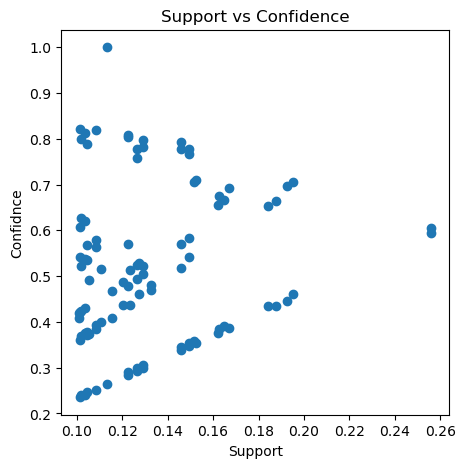

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [56]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

C:\Users\my computer\AppData\Local\Temp\ipykernel_12188\3545437843.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = lift.pivot('antecedents','consequents','lift')


consequents,(ChildBks),(YouthBks),(CookBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ArtBks, ChildBks)","(CookBks, RefBks)","(ChildBks, RefBks)",...,"(ArtBks, GeogBks)","(YouthBks, ChildBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, ChildBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
(CookBks),1.404179,1.518667,NaN,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,...,1.883445,1.813963,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,1.841017,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN
"(ArtBks, ChildBks)",NaN,NaN,1.806175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN
"(CookBks, ArtBks)",1.790745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.245509,NaN,NaN,2.155264,NaN,NaN
"(ChildBks, RefBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

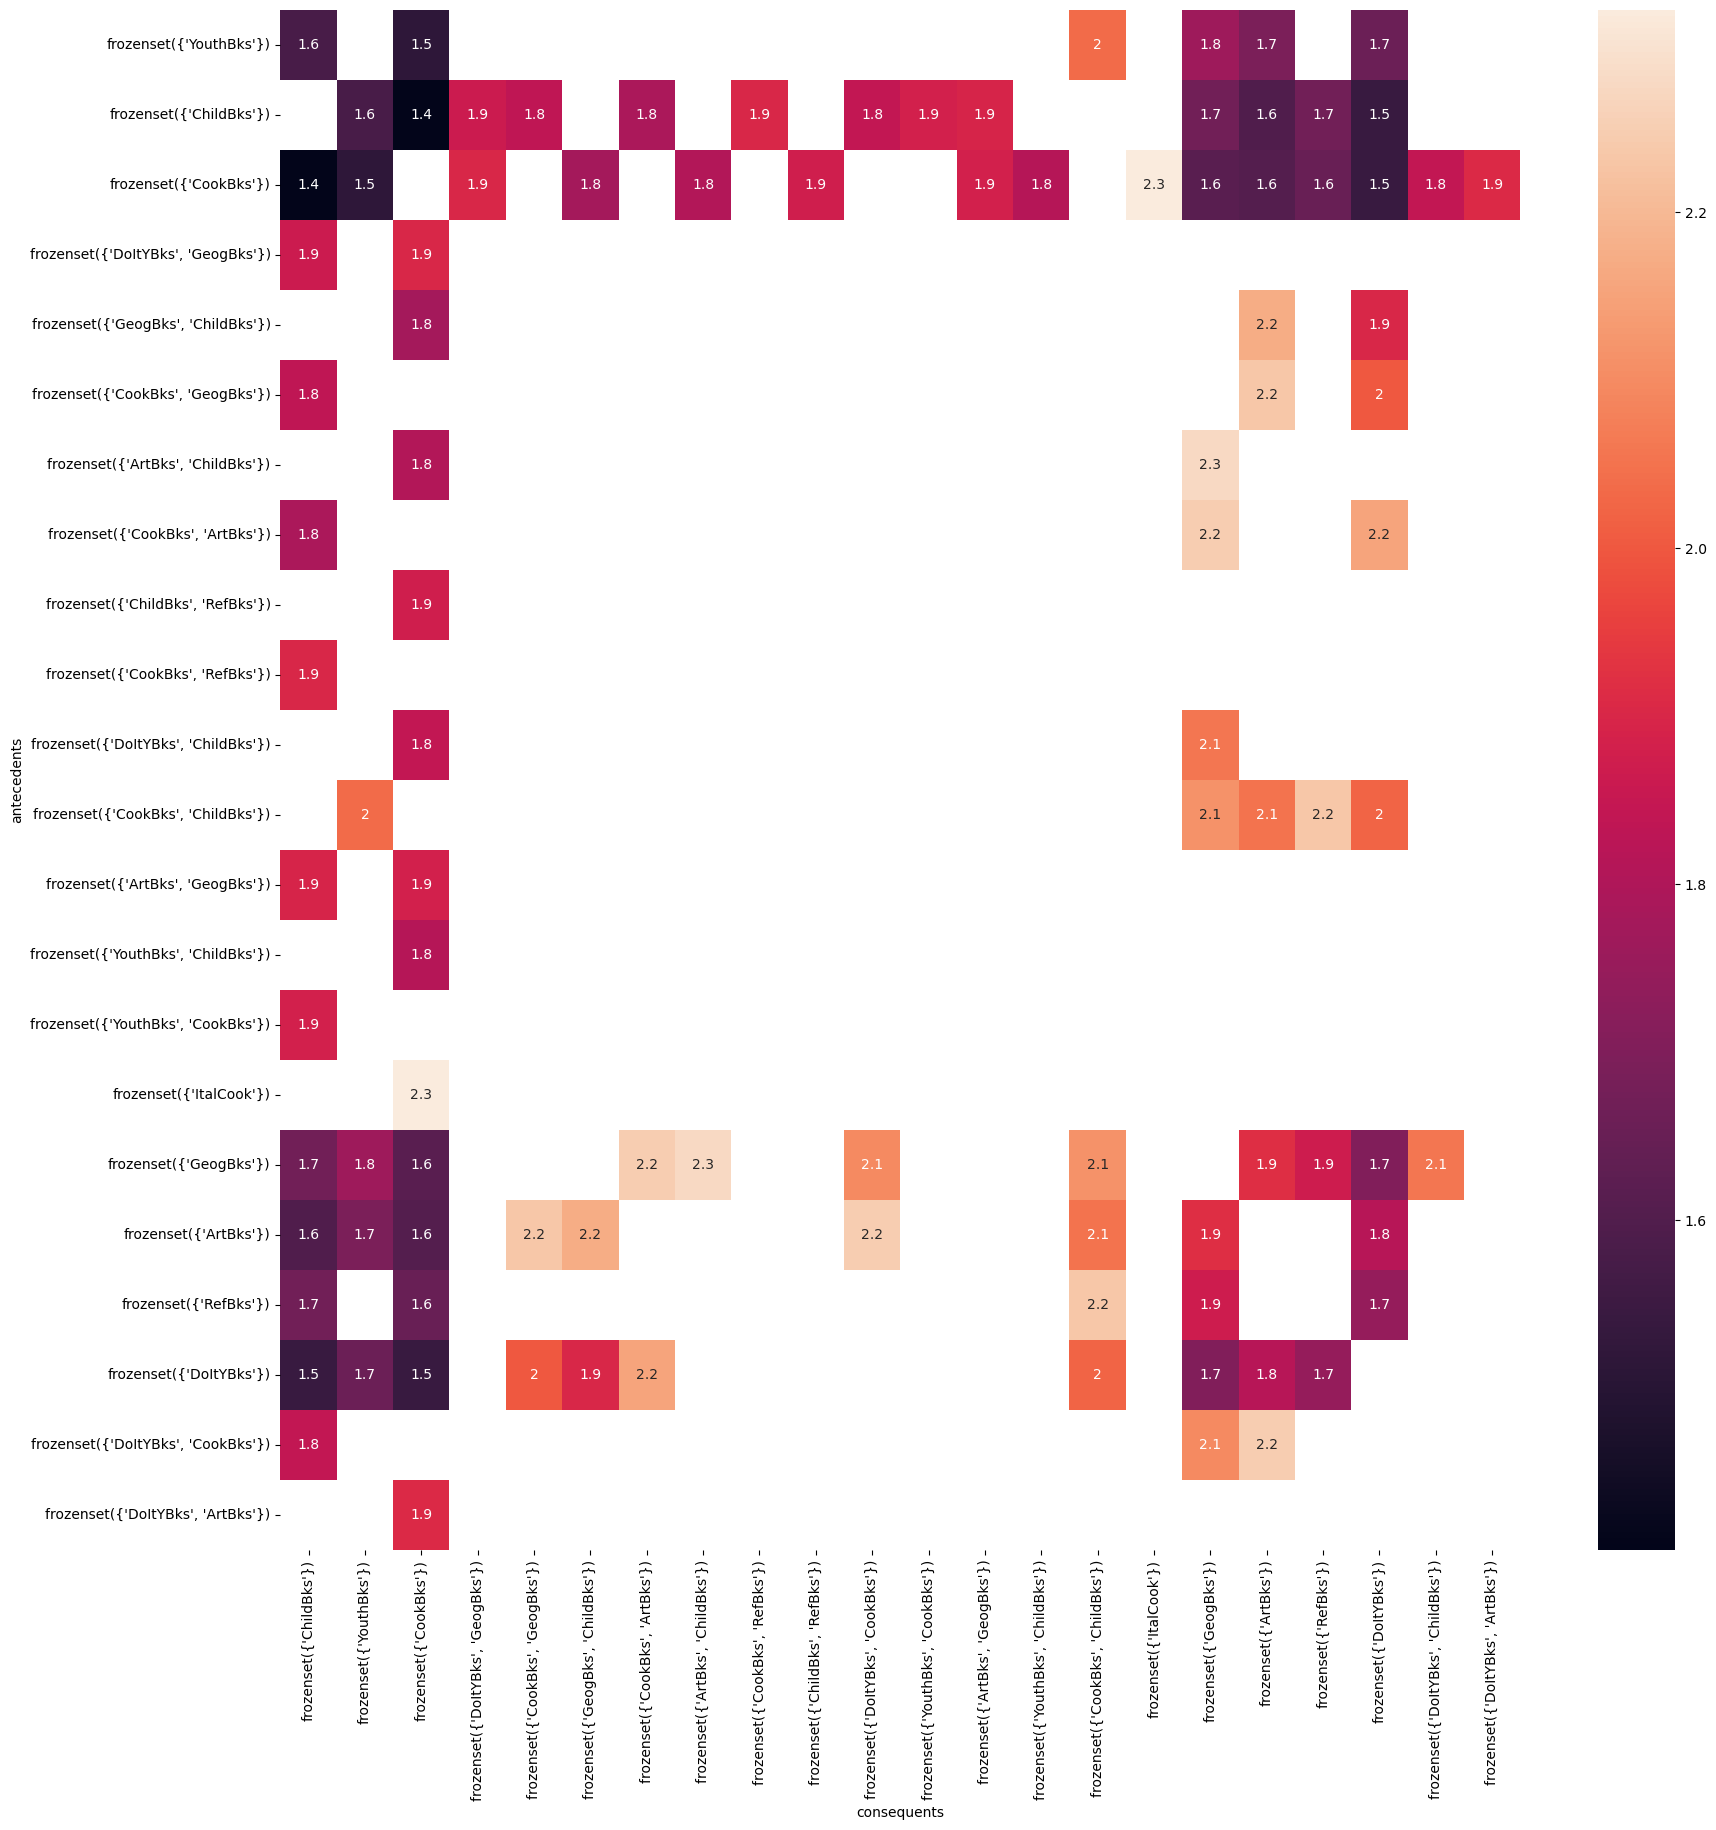

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

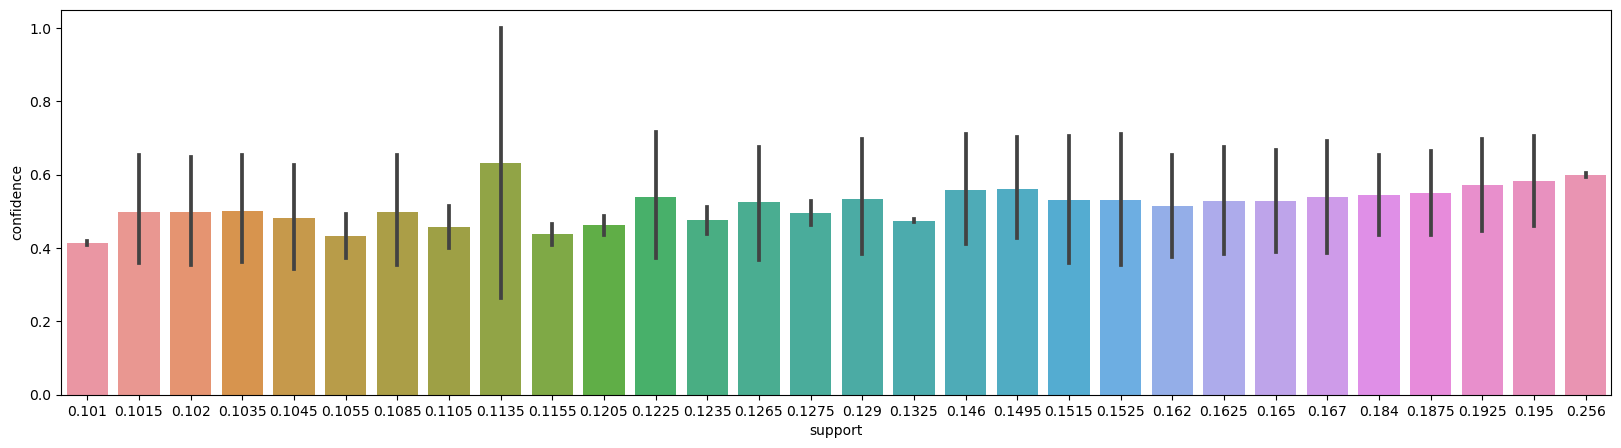

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x='support',y='confidence',data=lift)

Text(0.5, 1.0, 'Lift vs Confidence')

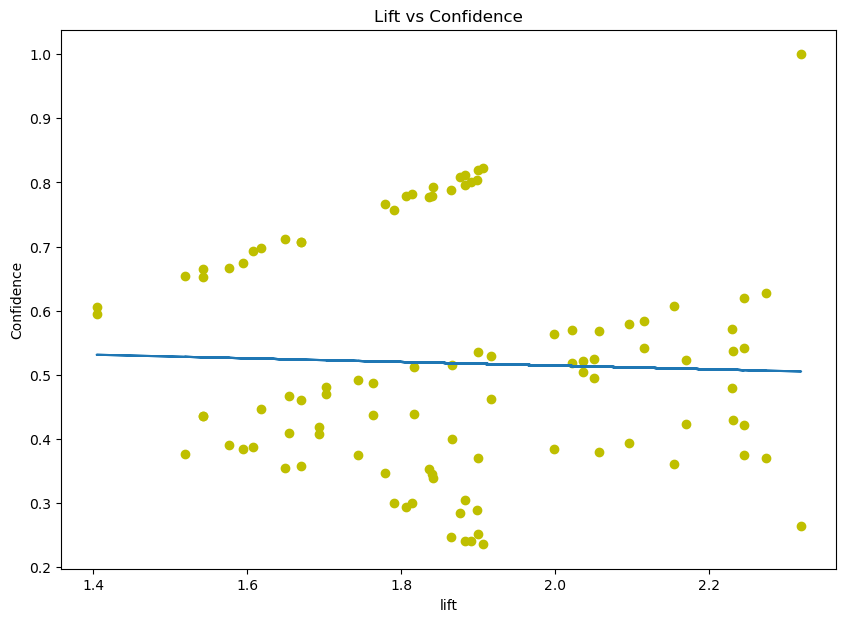

In [59]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [60]:
# Assosiation rule with 10% support and 70% confidence

In [61]:
freq1=apriori(df,min_support=0.1,use_colnames=True)
freq1

C:\Users\my computer\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [62]:
rules1=association_rules(freq1,metric='lift',min_threshold=0.70)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [63]:
lift1=rules1[rules1.lift>1]
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


Text(0.5, 1.0, 'Support vs Confidence')

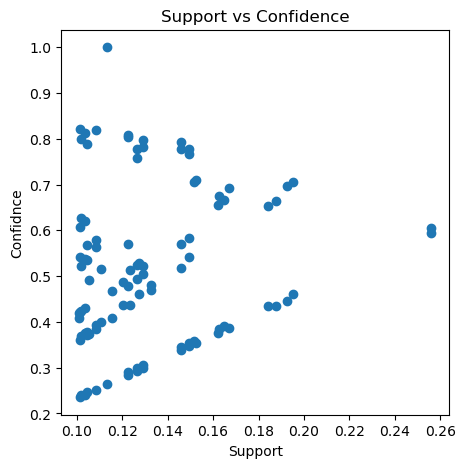

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [65]:
matrix1 = lift1.pivot('antecedents','consequents','lift')
matrix1

C:\Users\my computer\AppData\Local\Temp\ipykernel_12188\2359612302.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix1 = lift1.pivot('antecedents','consequents','lift')


consequents,(ChildBks),(YouthBks),(CookBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ArtBks, ChildBks)","(CookBks, RefBks)","(ChildBks, RefBks)",...,"(ArtBks, GeogBks)","(YouthBks, ChildBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, ChildBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
(CookBks),1.404179,1.518667,NaN,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,...,1.883445,1.813963,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,1.841017,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN
"(ArtBks, ChildBks)",NaN,NaN,1.806175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN
"(CookBks, ArtBks)",1.790745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.245509,NaN,NaN,2.155264,NaN,NaN
"(ChildBks, RefBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

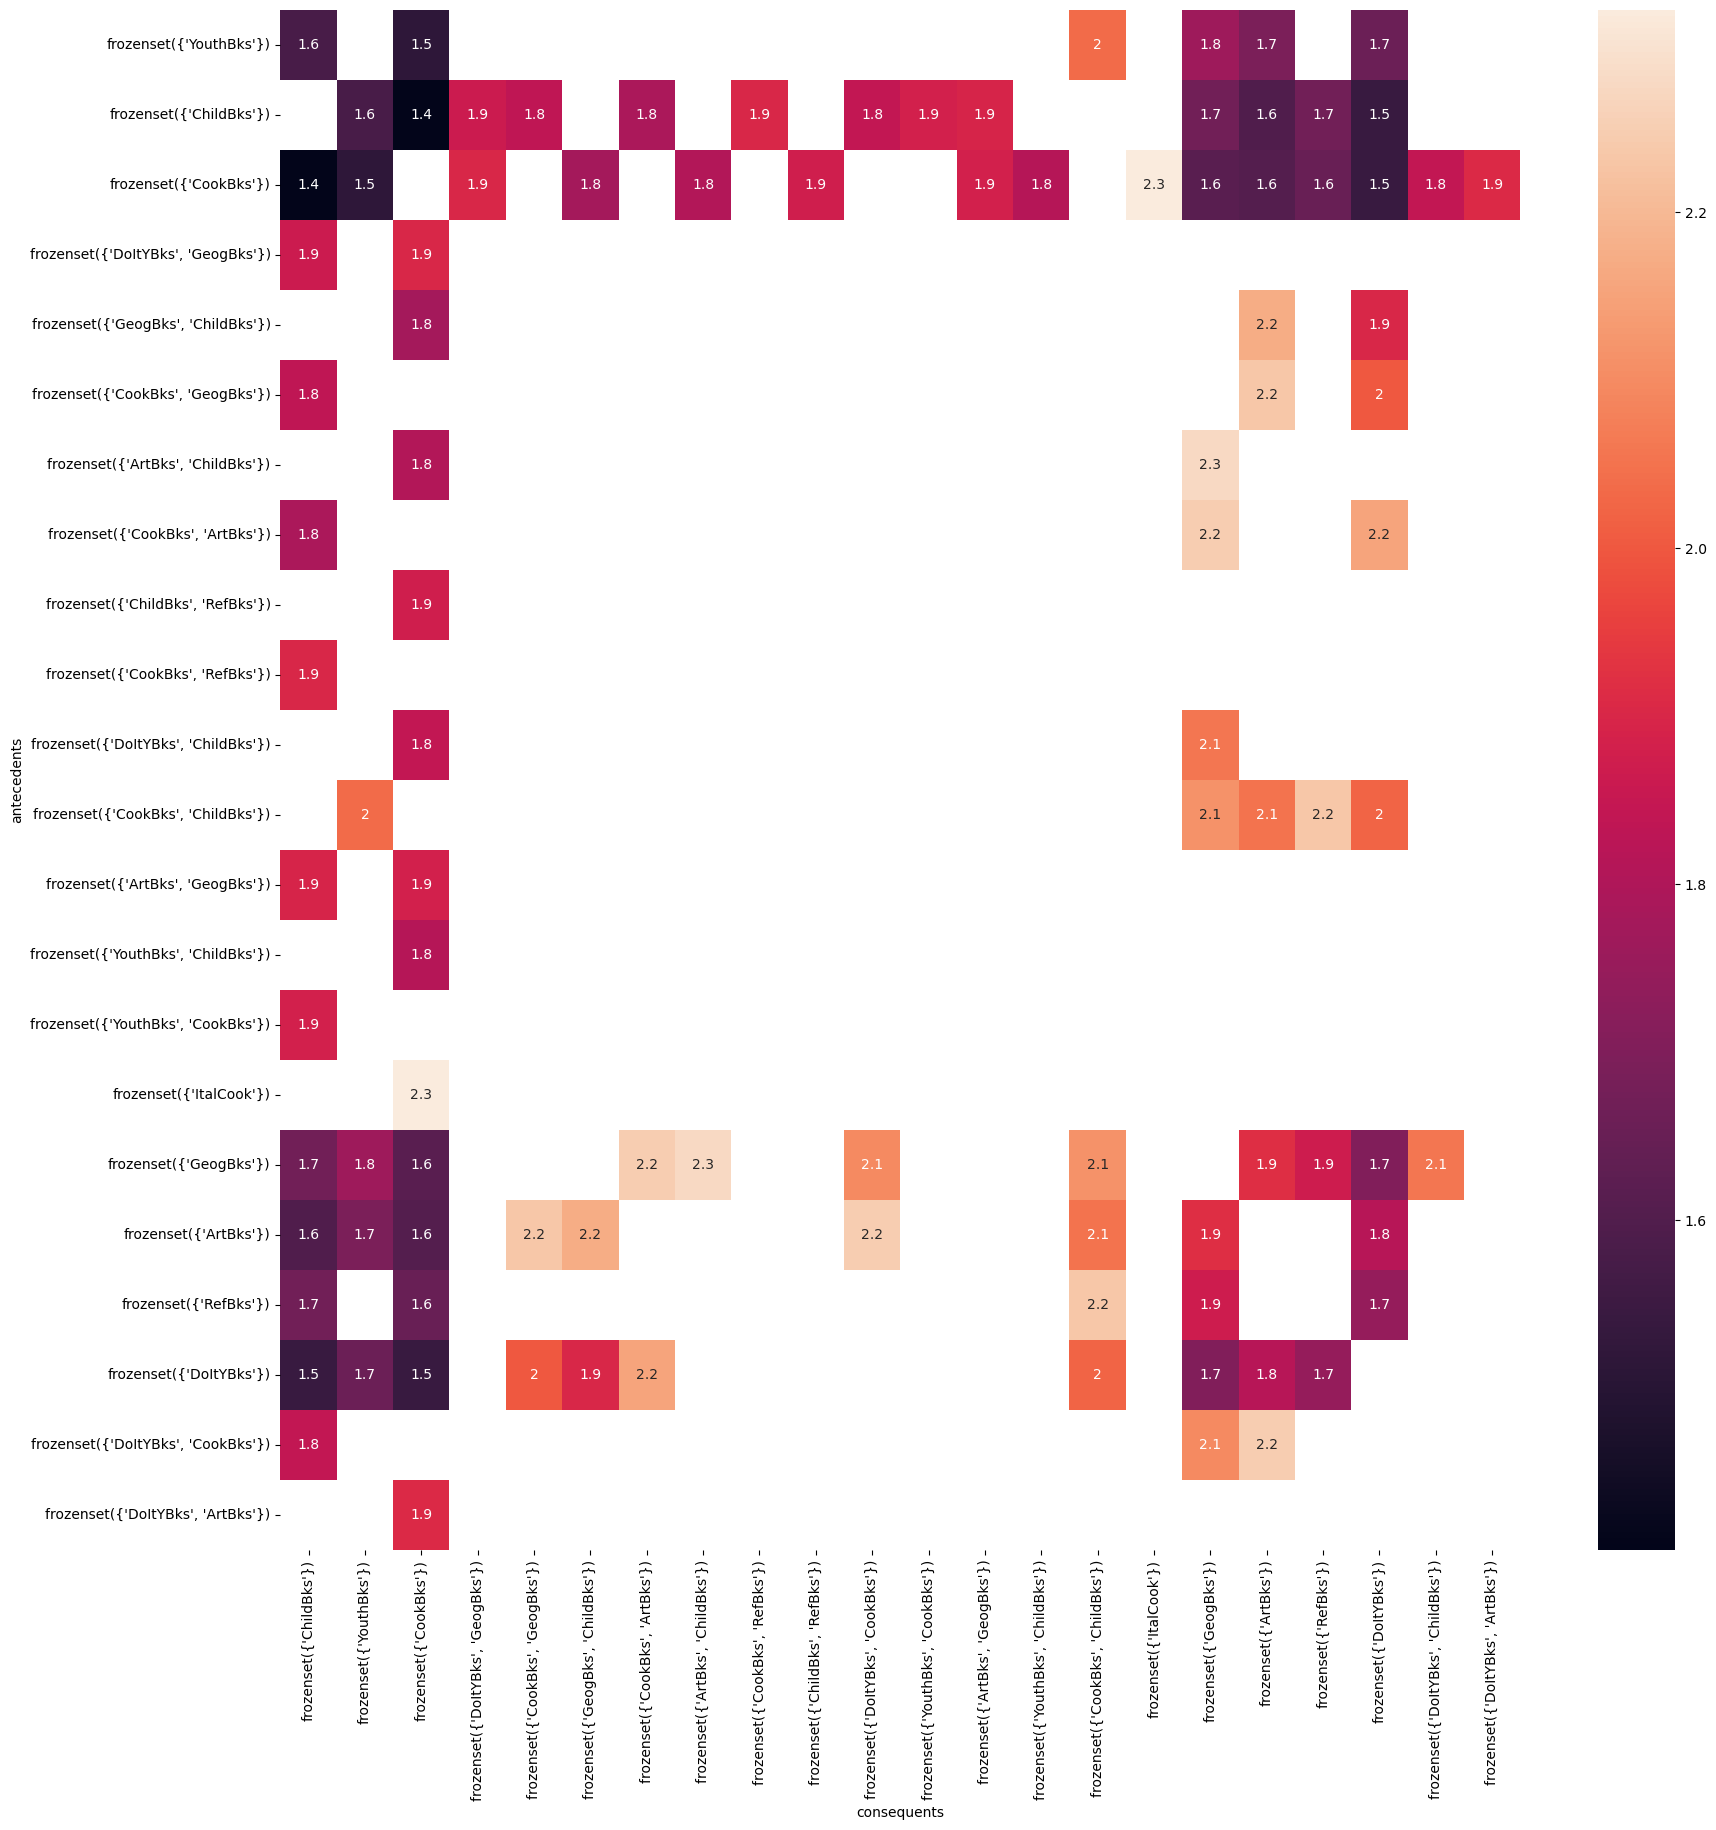

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix1,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

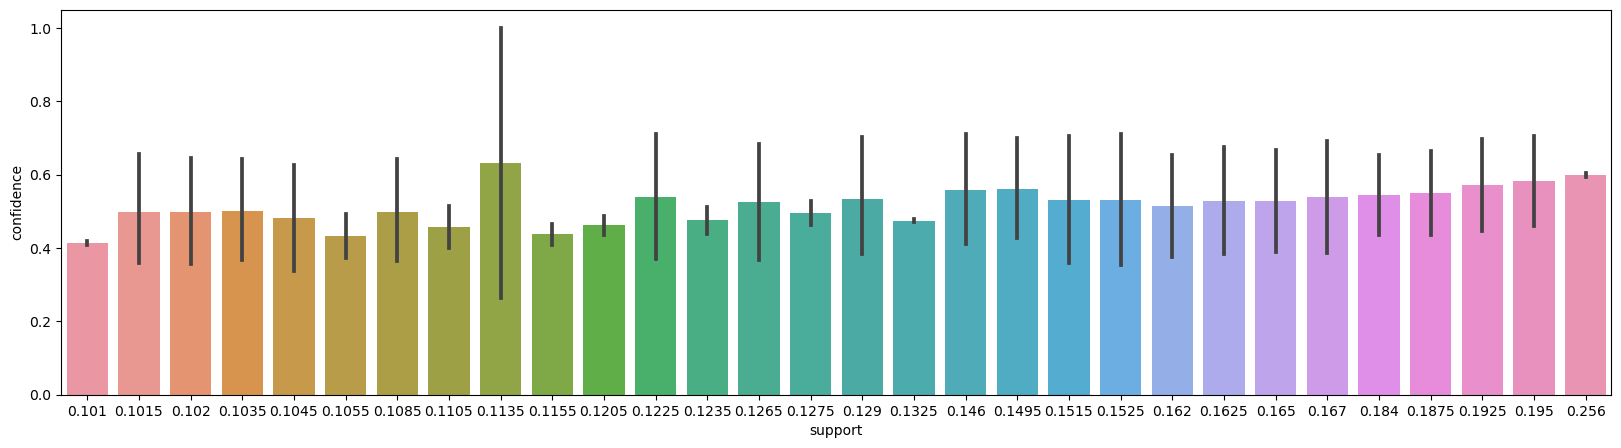

In [67]:
plt.figure(figsize=(20,5))
sns.barplot(x='support',y='confidence',data=lift1)

Text(0.5, 1.0, 'Lift vs Confidence')

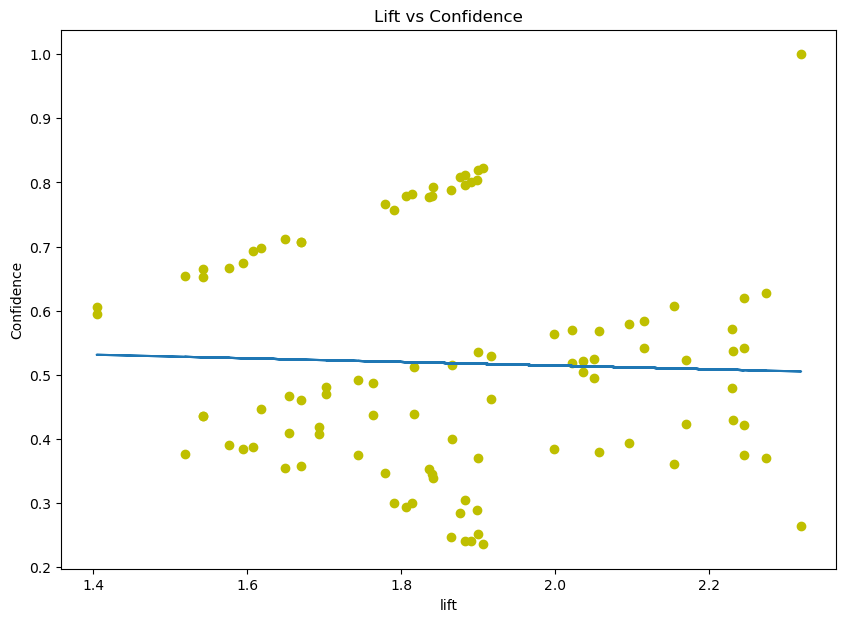

In [68]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
fit_fn(rules1['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [69]:
# Assosiation rule with 15% support and 40% confidence

In [70]:
freq2=apriori(df,min_support=0.15,use_colnames=True)
freq2

C:\Users\my computer\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [71]:
rules2=association_rules(freq2,metric='lift',min_threshold=0.40)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855


In [72]:
lift2=rules2[rules2.lift>1]
lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855


Text(0.5, 1.0, 'Support vs Confidence')

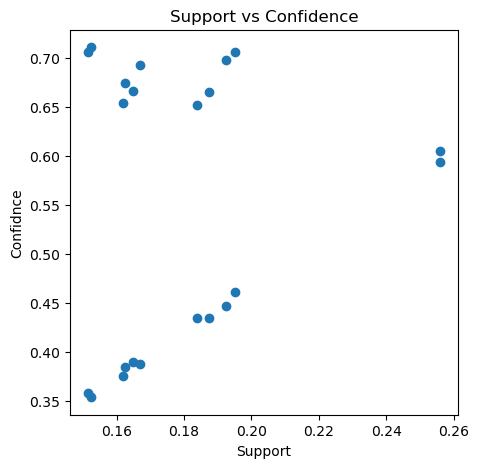

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [74]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2

C:\Users\my computer\AppData\Local\Temp\ipykernel_12188\695076964.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix2 = lift2.pivot('antecedents','consequents','lift')


consequents,(ChildBks),(YouthBks),(CookBks),(DoItYBks),(RefBks),(ArtBks),(GeogBks)
antecedents,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.542511,1.669725,1.594028,1.670264
(CookBks),1.404179,1.518667,NaN,1.542677,1.649549,1.607763,1.618245
(DoItYBks),1.542511,NaN,1.542677,NaN,NaN,NaN,NaN
(RefBks),1.669725,NaN,1.649549,NaN,NaN,NaN,NaN
(ArtBks),1.594028,NaN,1.607763,NaN,NaN,NaN,NaN
(GeogBks),1.670264,NaN,1.618245,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

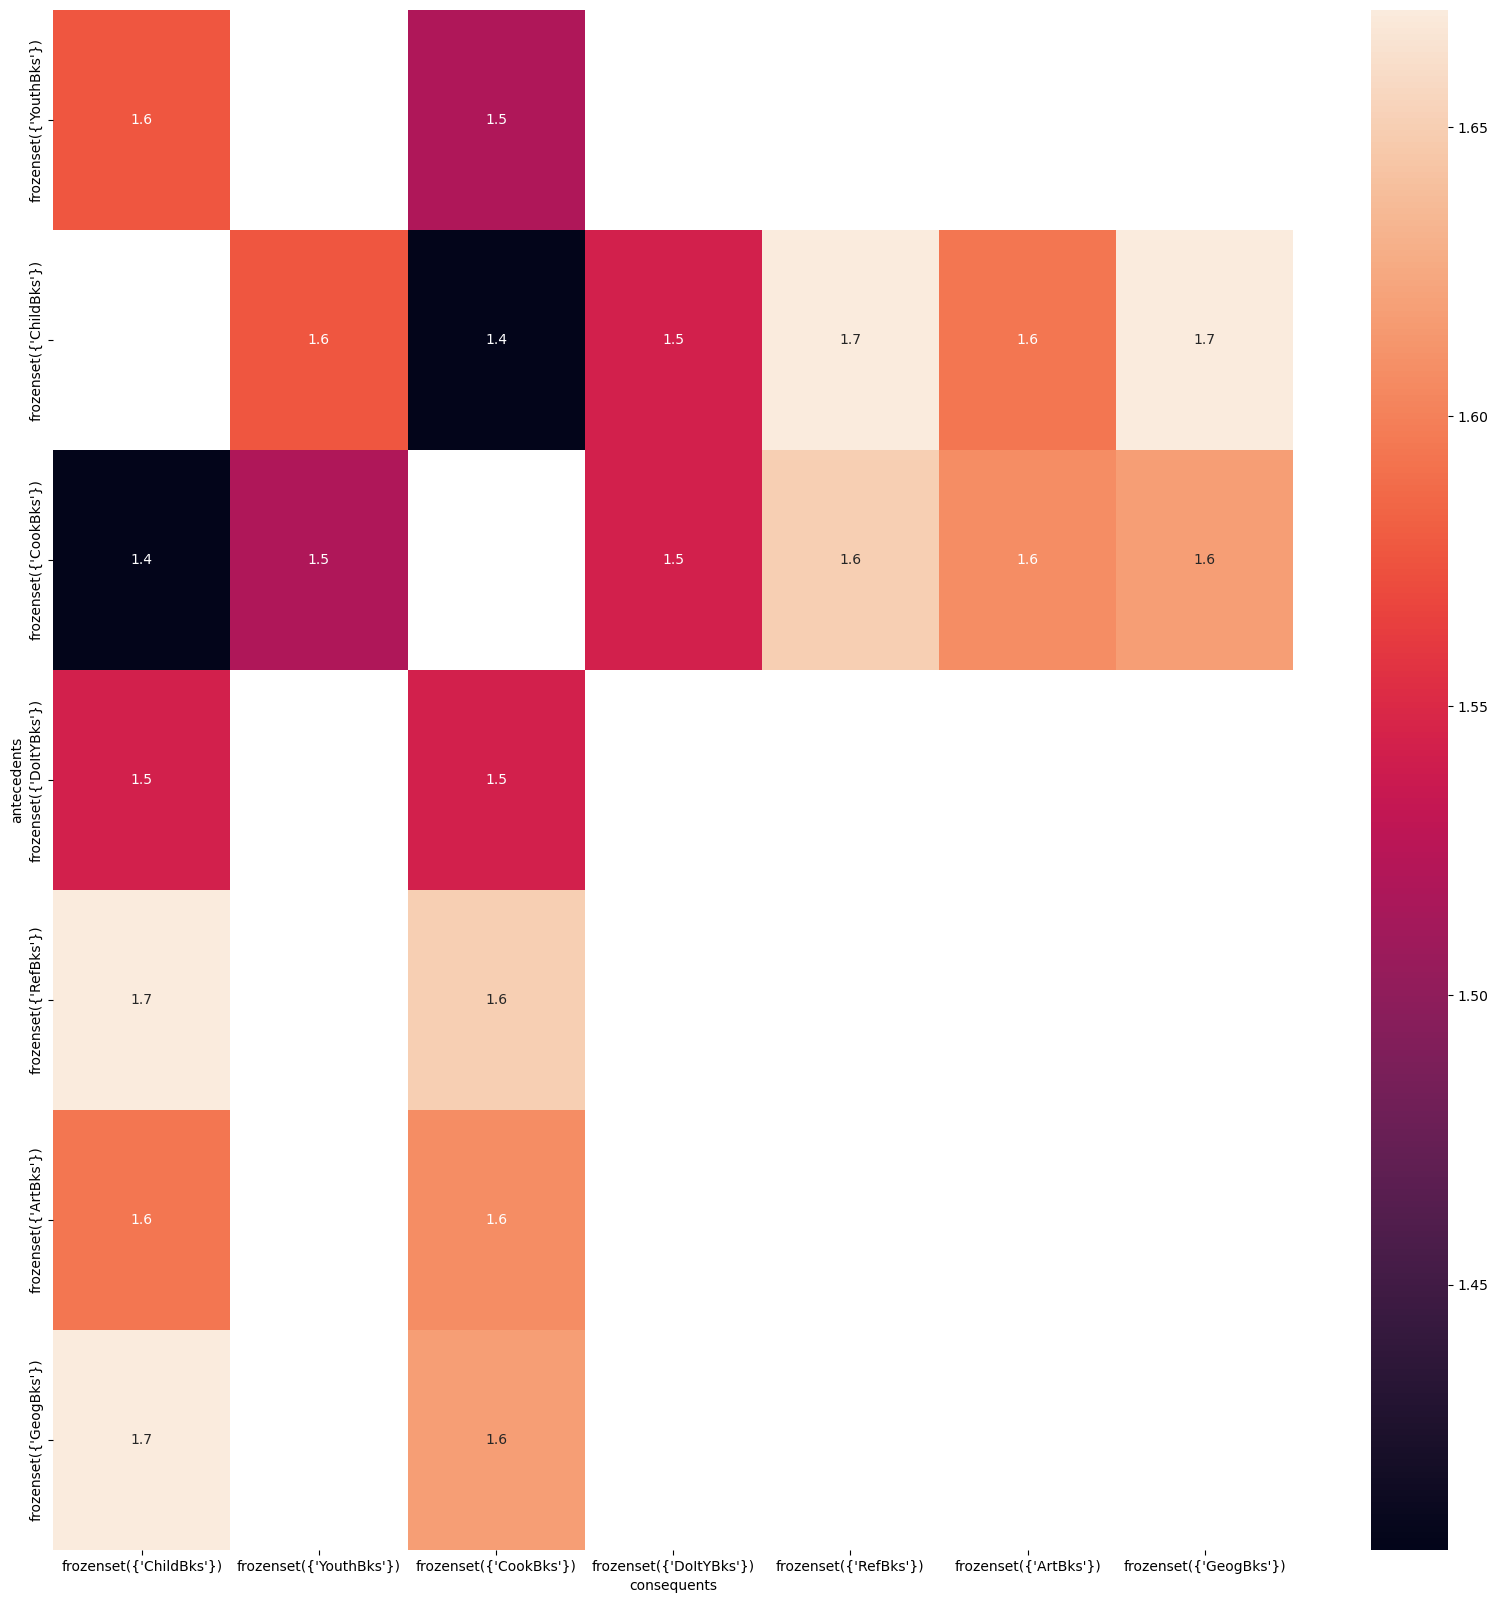

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix2,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

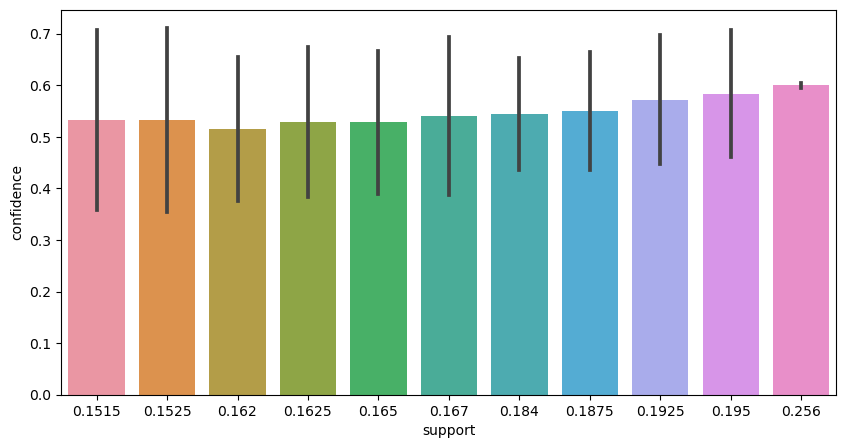

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='support',y='confidence',data=lift2)

Text(0.5, 1.0, 'Lift vs Confidence')

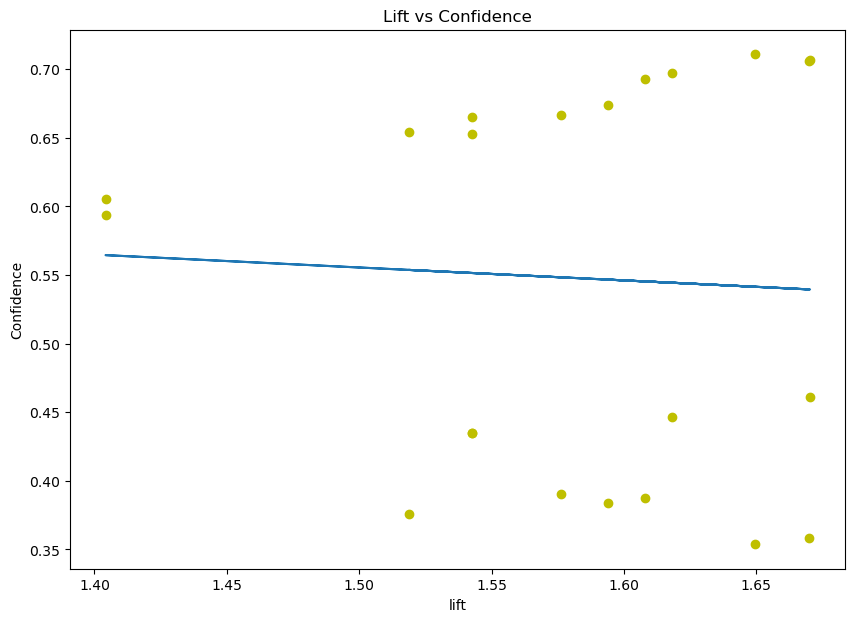

In [77]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'], 
fit_fn(rules2['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [78]:
# Assosiation rule with 20% support and 60% confidence

In [79]:
freq3=apriori(df,min_support=0.2,use_colnames=True)
freq3

C:\Users\my computer\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [80]:
rules3=association_rules(freq3,metric='lift',min_threshold=0.60)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [81]:
lift3=rules3[rules3.lift>1]
lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


Text(0.5, 1.0, 'Support vs Confidence')

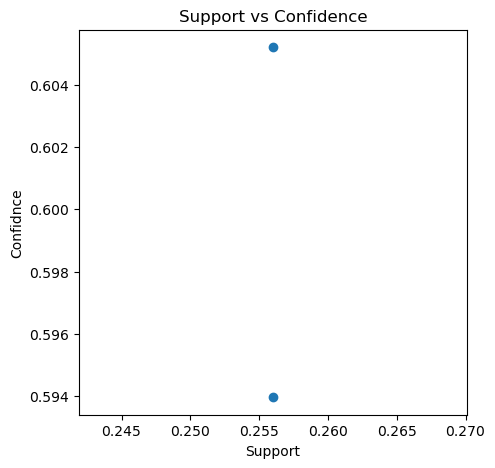

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [83]:
matrix3 = lift3.pivot('antecedents','consequents','lift')
matrix3

C:\Users\my computer\AppData\Local\Temp\ipykernel_12188\470896395.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix3 = lift3.pivot('antecedents','consequents','lift')


consequents,(ChildBks),(CookBks)
antecedents,,
(CookBks),1.404179,NaN
(ChildBks),NaN,1.404179


<Axes: xlabel='consequents', ylabel='antecedents'>

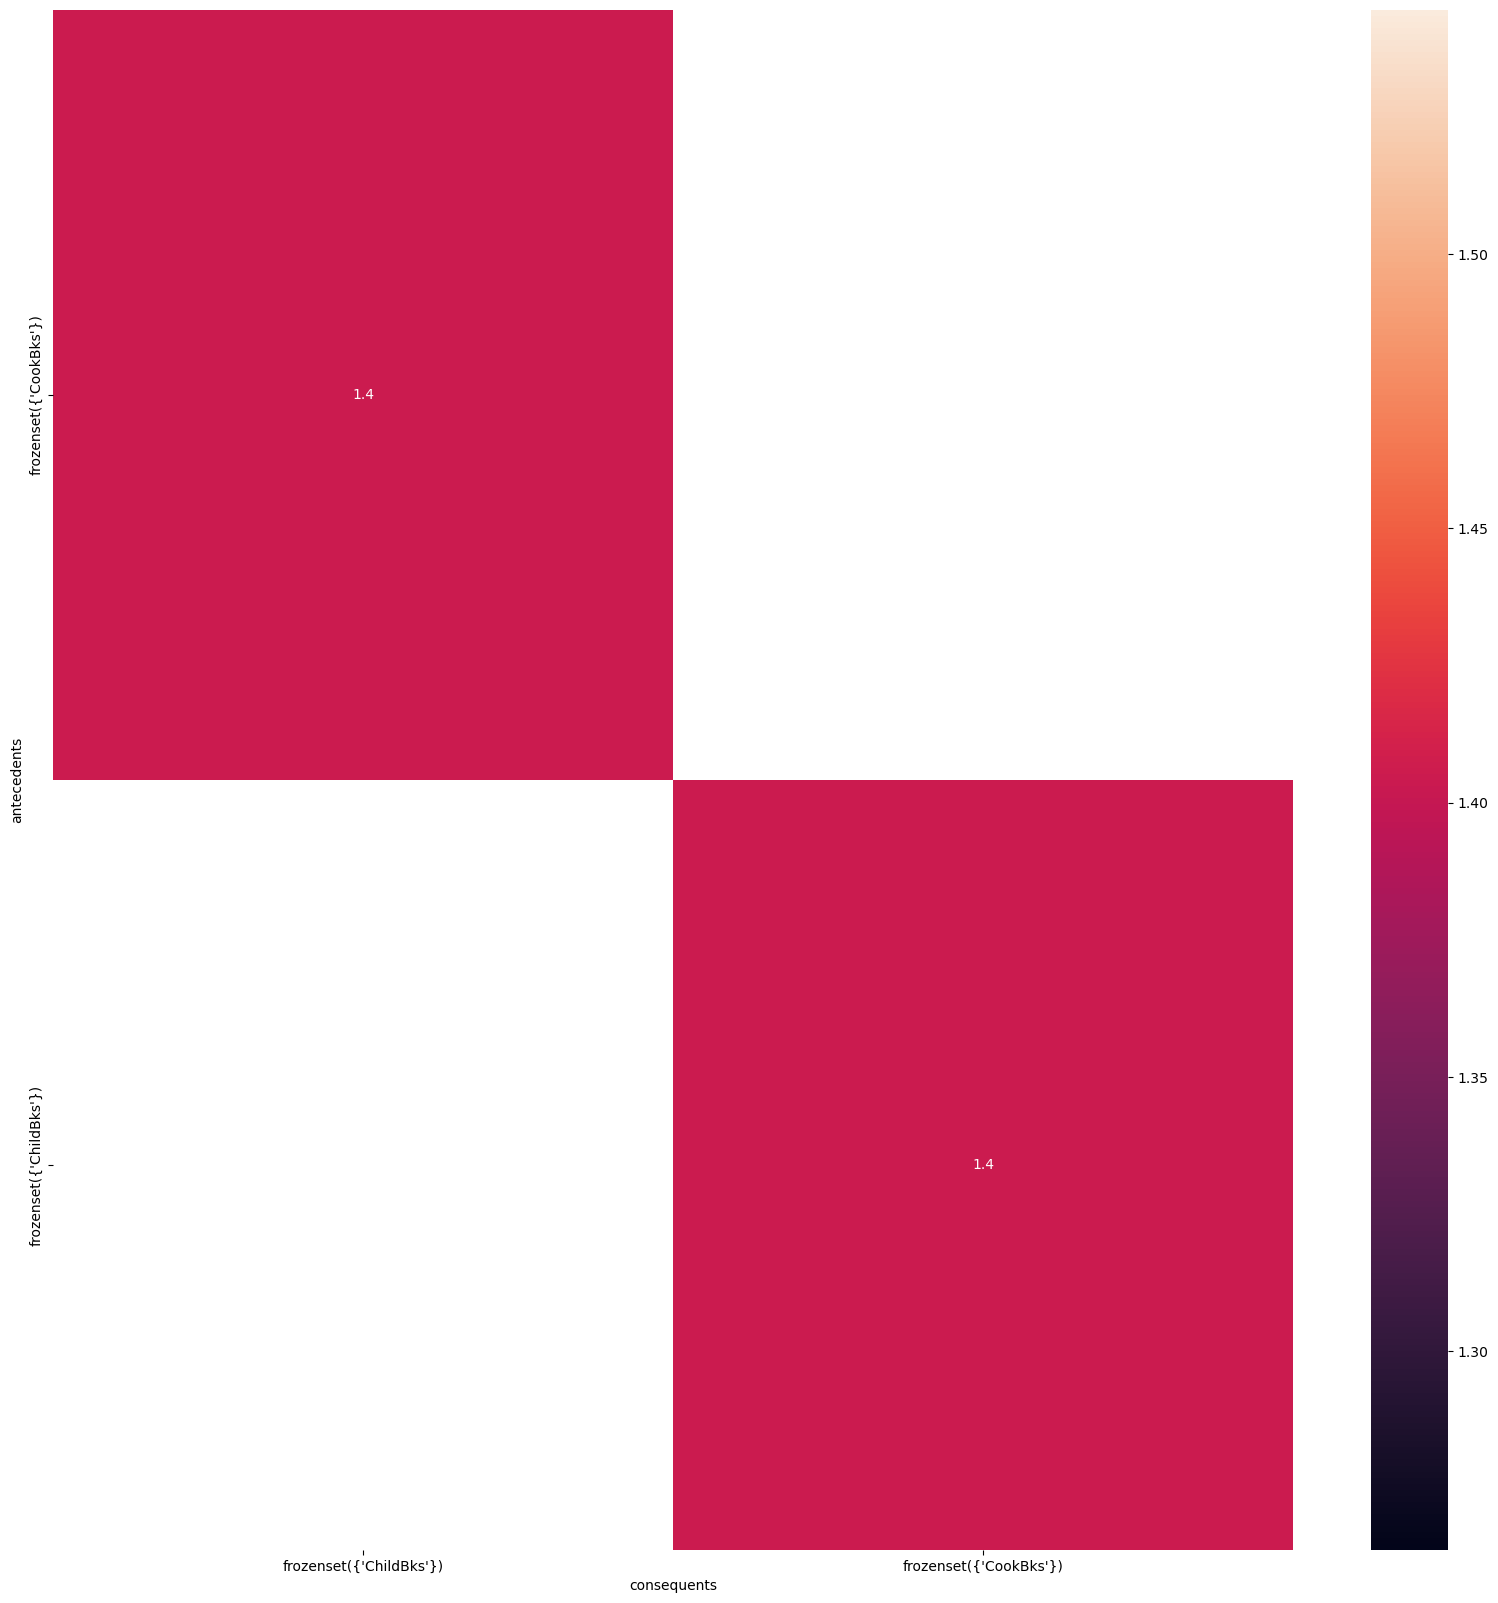

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix3,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

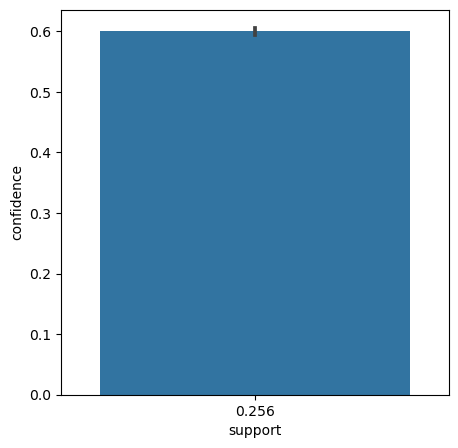

In [85]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift3)

C:\Users\my computer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Lift vs Confidence')

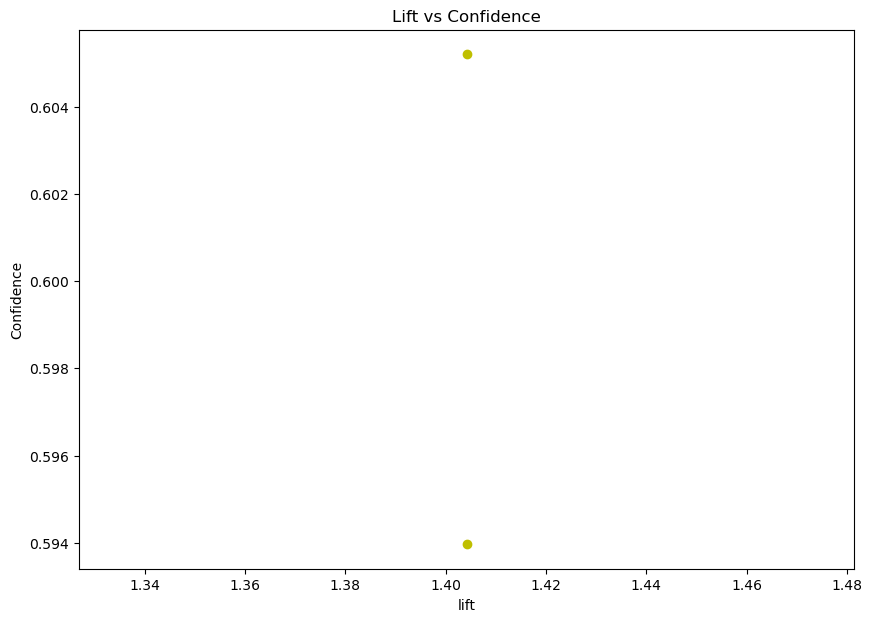

In [86]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules3['lift'], rules3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'], 
fit_fn(rules3['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')